# Getting Started with SQL and BigQuery
[Tutorial Link](https://www.kaggle.com/dansbecker/getting-started-with-sql-and-bigquery) <br/>
[Notebook Link](https://www.kaggle.com/mahendrabishnoi2/03-intro-to-sql/) on kaggle.

## Introduction
- **SQL**(Structured Query Language) - A programming language used with databases. <br>
- **BigQuery** - A web service that lets us apply SQL to huge datasets.

In this tutorial we will learn about accessing and examining BigQuery datasets.

## First BigQuery commands
To use BigQuery we will import the Python package.

In [1]:
from google.cloud import bigquery

First step in the workflow is to create a `Client` objct. `Client` object plays a central role in retrieving information from bigquery datasets.

In [2]:
# Create a client object
client = bigquery.Client()

Using Kaggle's public dataset BigQuery integration.


We will work with dataset of posts on [Hacker News](https://news.ycombinator.com/)

In BigQuery each dataset in contained in a corresponding project. In this case `hacker_news` dataset is contained in the `bigquery-public-data` project. To access the dataset,
- Construct a reference to the dataset by using `dataset()` method.
- Next, use the `get_dataset()` method, along with the reference we just constructed, to fetch the dataset.

In [3]:
# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [4]:
# construct a reference to the hacker_news dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

Each dataset is a collection of tables.

We use `list_tables()` method to list tables present in the dataset.

In [5]:
# List tables present in "hacker_news" dataset
tables = list(client.list_tables(dataset))

# print names of all tables present in the dataset
for table in tables:
    print(table.table_id)

comments
full
full_201510
stories


Similar to how we fetched a dataset, we can fetch a table. In the code below we fetch the `full` table in the `hacker_news` dataset using `get_table()` method.

In [6]:
# Create a table reference ("full")
table_ref = dataset_ref.table("full")

# API request - fetch the full table
table = client.get_table(table_ref)

What we have learnt so far:
<img src="https://i.imgur.com/biYqbUB.png"/>

## Table Schema
Structure of a table is called its schema. We need to understand a table's schema to pull the data we want.

Here we will investigate the `full` table that we fetched earlier.

In [7]:
table.schema

[SchemaField('by', 'STRING', 'NULLABLE', "The username of the item's author.", ()),
 SchemaField('score', 'INTEGER', 'NULLABLE', 'Story score', ()),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', ()),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', 'Timestamp for the unix time', ()),
 SchemaField('title', 'STRING', 'NULLABLE', 'Story title', ()),
 SchemaField('type', 'STRING', 'NULLABLE', 'Type of details (comment, comment_ranking, poll, story, job, pollopt)', ()),
 SchemaField('url', 'STRING', 'NULLABLE', 'Story url', ()),
 SchemaField('text', 'STRING', 'NULLABLE', 'Story or comment text', ()),
 SchemaField('parent', 'INTEGER', 'NULLABLE', 'Parent comment ID', ()),
 SchemaField('deleted', 'BOOLEAN', 'NULLABLE', 'Is deleted?', ()),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', ()),
 SchemaField('descendants', 'INTEGER', 'NULLABLE', 'Number of story or poll descendants', ()),
 SchemaField('id', 'INTEGER', 'NULLABLE', "The item's unique id.", ()),
 SchemaField('ran

Each `SchemaField` tells us about a specific column (also referred to as `field`). In order the information is:
- The **name** of the column
- The **field type** (or **data type**) of the column
- The **mode** of the column (`NULLABLE` means the column allows NULL values, default)
- A **description** of the data in that column

The first **field** has the `SchemaField`:
`SchemaField('by', 'STRING', 'NULLABLE', "The username of the item's author.", ()),` <br/>
This tells us:
- The **field** (or **column**) is called `by`,
- The data in the field is strings,
- This column allow NULL values,
- This column contains username of item's author.

We can use `list_rows()` method to show first five rows of the `full` table to make sure its right. This returns a BigQuery `RowIterator` object which can be converted to pandas DataFrame using `to_dataframe()` method.

In [8]:
# print first five rows of the "full" table
client.list_rows(table, max_results=5).to_dataframe()

,by,score,time,timestamp,title,type,url,text,parent,deleted,dead,descendants,id,ranking
0,sid6376,NaN,1313509335,2011-08-16 15:42:15+00:00,,comment,,Congratulations :),2891541.0,None,None,NaN,2891593,None
1,acabal,NaN,1507582201,2017-10-09 20:50:01+00:00,,comment,,It&#x27;s so crazy to me that everyone in vuln...,15436943.0,None,None,NaN,15437345,None
2,albertfdp,3.0,1448317337,2015-11-23 22:22:17+00:00,// TODO: this is a temporary post title,story,https://medium.com/@davitferreira/todo-this-is...,,NaN,None,None,0.0,10617772,None
3,odonnellryan,NaN,1388778834,2014-01-03 19:53:54+00:00,,comment,,"Well, I think the answer to your question is c...",7007658.0,None,None,NaN,7007696,None
4,abandonliberty,NaN,1447343144,2015-11-12 15:45:44+00:00,,comment,,My friend who fled East Germany feels we are l...,10552948.0,None,None,NaN,10553796,None


Above code printed out first five rows of all **fields**, we can also print first five rows of selected fields if we want. For example here we will print first five rows of `by` **field**

In [9]:
# print first five rows of "by" column (or field) of "full" table
client.list_rows(table, selected_fields=table.schema[:1], max_results=5).to_dataframe()

,by
0,sid6376
1,acabal
2,albertfdp
3,odonnellryan
4,abandonliberty


**Setup**
- import `from google.cloud import bigquery`
- create a client object `client = bigquery.Client()

**Fetching Dataset**
- create a reference to dataset `dataset_ref = client.dataset("dataset_name", project="project_name")`
- fetch dataset `dataset = client.get_dataset(dataset_ref)

**List all tables present in dataset**
- list tables `tables = list(client.list_tables(dataset))` `print(table[0].table_id)`

**Fetch a table from dataset**
- create reference to a table `table_ref = dataset_ref.table("table_name")`
- fetch table `table = client.get_table(table_ref)`

**Schema**
- schema of a table `table.schema`

**List rows**
- all rows `client.list_rows(table, max_results=5).to_dataframe()`
- specific columns `client.list_rows(table, selected_fields=table.schema[:1], max_results=5).to_dataframe()`

Exercises of this tutorial are solved [here](https://www.kaggle.com/mahendrabishnoi2/exercise-getting-started-with-sql-and-bigquery)

# SELECT, FROM & WHERE
[Tutorial Link](https://www.kaggle.com/dansbecker/select-from-where)

Now that we know how to access and examine a dataset, we will start writing SQL queries. SQL queries help us sort through massive datasets, to retrieve only the information we want.

In this tutorial we will **SELECT**, **FROM** and **WHERE** to get data from specific columns based on specified conditions.

We will work with an small imaginary dataset `pet_records` which contains just one table, called `pets`.
<img src="https://i.imgur.com/fI5Pvvp.png"/>

## SELECT ... FROM
The most basic SQL query selects single column from a table. To do this 
- specify the column you want after the word **SELECT**, and then
- specify the table after the word **FROM**

To select the `Name` column (from the `pets` table, in the `pet_records` databse in the `bigquery-public-data` project), our query would appear as follows:
<img src="https://i.imgur.com/c3GxYRt.png"/>

> Note: When writing a SQL query, the argument passed to **FROM** is not in single or double quotation marks (' or "). Its in backticks (\`).

## WHERE
BigQuery datasets are huge, so we'll usually want to return rows meeting specific conditions. We can do so using the **WHERE** clause.

The query below returns the entries from the `name` column that are in rows where the `Animal` column has the text `Cat`.
<img src="https://i.imgur.com/HJOT8Kb.png"/>


## Example: Where all the the US citites in the OpenAQ dataset?
We'll use [OpenAQ](https://openaq.org/) dataset about air quality. 

In [10]:
# imports 
from google.cloud import bigquery

# create a client object 
client = bigquery.Client()

# create a dataset reference (to openaq)
dataset_ref = client.dataset("openaq", project="bigquery-public-data")

# api request - fetch data
dataset = client.get_dataset(dataset_ref)

# create a list of tables present in the dataset
tables = list(client.list_tables(dataset))

# print all table names
for table in tables:
    print(table.table_id)

Using Kaggle's public dataset BigQuery integration.
global_air_quality


In [11]:
# construct a reference to the table
table_ref = dataset_ref.table("global_air_quality")

# api request - fetch table
table = client.get_table(table_ref)

# print first five rows / lines of "global_air_quality" table
client.list_rows(table, max_results=5).to_dataframe()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,co,910.00,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
1,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,no2,131.87,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
2,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,o3,15.57,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
3,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,pm25,45.62,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
4,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,so2,4.49,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25


Write a query to select `city` column from `global_air_quality` table where `country` is `US`

In [12]:
# Query to select all the items from the "city" column where the "country" column is 'US'
query = """
        SELECT city
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

## Submitting the query to the dataset
- Create a client object

In [13]:
client = bigquery.Client()

Using Kaggle's public dataset BigQuery integration.


Next we set up the query with the `query()` method. We will run the method with the default parameters but this method allows us to specify complicated settings as shown in [documentation](https://google-cloud.readthedocs.io/en/latest/bigquery/generated/google.cloud.bigquery.client.Client.query.html#google.cloud.bigquery.client.Client.query).

In [14]:
query_job = client.query(query)

Next we run the query and convert results to a pandas dataframe

In [15]:
# api request - run the query and return a pandas DataFrame
us_cities = query_job.to_dataframe()

In [16]:
us_cities.city.value_counts().head()

Phoenix-Mesa-Scottsdale             87
Houston                             80
Los Angeles-Long Beach-Santa Ana    60
San Francisco-Oakland-Fremont       58
Riverside-San Bernardino-Ontario    57
Name: city, dtype: int64

## More queries
If we want multiple columns we can select them with comma

In [17]:
query = """
        SELECT city, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country="US"
        """

If we want to select all columns we can use `*`

In [18]:
query = """
        SELECT *
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country="US"
        """

## Working with Big Datasets
To avoid scanning too much data at once, we can estimate size of query before we run it. We will see how to estimate query size on very large `hacker_news` dataset.

To see how much data a query will scan, we create a `QueryJobConfig` object and set the `dry_run` parameter to `True`.

In [19]:
# query to get the score column from every row where the type column has value "job"
query = """
        SELECT score, title
        FROM `bigquery-public-data.hacker_news.full`
        WHERE type = "job" 
        """

# create 'QueryJobConfig' object to estimate size of query without running it
dry_run_config = bigquery.QueryJobConfig(dry_run=True)

# api request - dry run query to estimate costs
dry_run_query_job = client.query(query, job_config=dry_run_config)

print("This query will process {} bytes".format(dry_run_query_job.total_bytes_processed))

This query will process 398118523 bytes


We can also specify a parameter when running the query to limit how much data we want to scan. Here's an example with a low limit.

In [20]:
def safe_config_f(max_size):
    return bigquery.QueryJobConfig(maximum_bytes_billed=max_size)

In [21]:
max_size = 1 
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=max_size)

# setup the query (only run if its less than 100 MB)
safe_query_job = client.query(query, job_config=safe_config)

# api request - run the query and return a pandas dataframe
safe_query_job.to_dataframe()


# strangely this query runs (need to take a look on documentation)

,score,title
0,46.0,Senior Software Engineer - Comprehend Systems ...
1,5.0,Airbnb - Backend Engineer
2,33.0,Justin.tv is looking for Fall Programming Inte...
3,26.0,Are you a law student or paralegal interested ...
4,18.0,CarWoo - Senior Rails Developer
5,2.0,Ridejoy's looking for a UX(+UI) designer. Engi...
6,65.0,Justin.tv - looking for hackers to work on esp...
7,4.0,Airbnb seeks UI designer
8,22.0,CarWoo - User Acquisition Hacker (YC S09)
9,12.0,W11 Database Startup Looking for Third Cofound...


In [22]:
# Only run the query if it's less than 1 GB
ONE_GB = 1000*1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

# Set up the query (will only run if it's less than 1 GB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
job_post_scores = safe_query_job.to_dataframe()

# Print average score for job posts
job_post_scores.score.mean()

1.957713593912141

Exercises of this tutorial are solved [here](https://www.kaggle.com/mahendrabishnoi2/exercise-select-from-where)

# Group By, Having & Count
[Tutorial Link](https://www.kaggle.com/dansbecker/group-by-having-count)

Now that we know how to select raw data, we will learn how to group selected data and count things within those groups to answer questions like: 
- How many of each kind of fruit has our store sold?
- How many species of animal has the vet office treated?



In this tutorial we will learn about **GROUP BY**, **HAVING** & **COUNT()**. We will be using following made-up table to understand these techniques
<img src="https://i.imgur.com/fI5Pvvp.png"/>

## COUNT()
**COUNT()**, as the name suggests return the count of things. If we pass name of a column to **COUNT()**, it will return number of items in that column.

For example if we **SELECT** the **COUNT()** of `ID` columns in `pets` table, it will return 4, because there are 4 IDs.
<img src="https://i.imgur.com/Eu5HkXq.png"/>

## GROUP BY
**GROUP BY** takes the name of one or more columns, and treats all rows with the same value in that column as a single group when you apply aggregate functions like **COUNT()**.

For example, say we want to know how many of each type of animal we have in the `pets` table. We can use **GROUP BY** to group together rows that have the same value in the `Animal` column, while using **COUNT()** to find out how many ID's we have in each group.
<img src="https://i.imgur.com/tqE9Eh8.png"/>
It returns a table with three rows (one for each distinct animal). We can see that the `pets` table contains 1 rabbit, 1 dog, and 2 cats.

## GROUP BY ... HAVING
**HAVING** is used in combination with **GROUP BY** to ignore groups that don't meet certain criteria.

So this query, for example, will only include groups that have more than one ID in them.
<img src="https://i.imgur.com/2ImXfHQ.png"/>

## Example: Which Hacker News comments generated the most discussion?
We will work with `comments` table.

In [23]:
# imports 
from google.cloud import bigquery

# create a client object
client = bigquery.Client()

# construct a reference to the hacker_news dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# api request - fetch dataset
dataset = client.get_dataset(dataset_ref)

# list tables in the 'hacker_news' dataset
tables = list(client.list_tables(dataset))

# print all tables present in the dataset
for table in tables:
    print(table.table_id)

Using Kaggle's public dataset BigQuery integration.
comments
full
full_201510
stories


In [24]:
# construct a reference to 'comments' table
table_ref = dataset_ref.table('comments')

# api request - fetch dataset
table = client.get_table(table_ref)

In [25]:
client.list_rows(table, max_results=5).to_dataframe()

,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
0,2701393,5l,5l,1309184881,2011-06-27 14:28:01+00:00,And the glazier who fixed all the broken windo...,2701243,None,None,0
1,5811403,99,99,1370234048,2013-06-03 04:34:08+00:00,Does canada have the equivalent of H1B/Green c...,5804452,None,None,0
2,21623,AF,AF,1178992400,2007-05-12 17:53:20+00:00,"Speaking of Rails, there are other options in ...",21611,None,None,0
3,10159727,EA,EA,1441206574,2015-09-02 15:09:34+00:00,Humans and large livestock (and maybe even pet...,10159396,None,None,0
4,2988424,Iv,Iv,1315853580,2011-09-12 18:53:00+00:00,I must say I reacted in the same way when I re...,2988179,None,None,0


From above table we can say that:
- id column shows id of each comment
- parent column shows the comment (id) that was replied to 

So we can **GROUP BY** the `parent` and **COUNT()** the `id` column to figure out the number of replies for every comment, and since we are looking for popular comments we can apply a condition using **HAVING** to return only those comments which received more than 10 replies.

In [26]:
# query to select comments that have more than 10 replies
query = """
        SELECT parent, COUNT(id)
        FROM `bigquery-public-data.hacker_news.comments`
        GROUP BY parent
        HAVING COUNT(id) > 10
        """

In [27]:
# set up query and QueryJobConfig (To be on safer side)
safe_config = bigquery.QueryJobConfig(max_bytes_billed = 10*9)       # 1 GB limit
query_job = client.query(query, job_config=safe_config)

# api request - run the query and return a pandas dataframe
popular_comments = query_job.to_dataframe()

# print first five rows of popular_comments dataframe
popular_comments.head()

,parent,f0_
0,6427895,46
1,202918,44
2,8120079,148
3,9016949,38
4,7075537,51


## Aliasing and Other Improvements
- The column resulting from **COUNT(id)** was called `f0__`. That's not a very descriptive name. We can change the name by adding `AS NumPosts` after we specify the aggregation.
- If we are ever unsure what to put inside the **COUNT()** function, we can do **COUNT(1)** to count the rows in each group. Most people find it especially readable, because we know it's not focusing on other columns. It also scans less data than if supplied column names (making it faster and using less of our data access quota(BigQuery 30 TB quota)).

In [28]:
# Imporoved version of earlier query with aliasing and improved readability
query_improved = """
                 SELECT parent, COUNT(1) AS NumPosts
                 FROM `bigquery-public-data.hacker_news.comments`
                 GROUP BY parent
                 HAVING COUNT(1) > 10
                 """

# set up query and QueryJobConfig (To be on safer side)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9) 
query_job = client.query(query_improved, job_config=safe_config)

# api request - run the query and return a pandas dataframe
improved_df = query_job.to_dataframe()

# print first five rows of improved_df dataframe
improved_df.head()

,parent,NumPosts
0,3873271,50
1,5308611,63
2,5176140,63
3,9269660,51
4,9439286,69


## Note on using **GROUP BY**
Note that because it tells SQL how to apply aggregate functions (like **COUNT()**), it doesn't make sense to use **GROUP BY** without an aggregate function. Similarly, if we have any **GROUP BY** clause, then all variables must be passed to either a
1. GROUP BY command, or
2. an aggregation function.

In [29]:
query_good = """
             SELECT parent, COUNT(id)
             FROM `bigquery-public-data.hacker_news.comments`
             GROUP BY parent
             """

# Example of a good query as parent is used with GROUP BY and id is used with COUNT()

In [30]:
query_bad = """
            SELECT author, parent, COUNT(id)
            FROM `bigquery-public-data.hacker_news.comments`
            GROUP BY parent
            """

# This query will throw an error because author is neither aggregated nor used with GROUP BY

Exercises of this tutorial are solved [here](https://www.kaggle.com/mahendrabishnoi2/exercise-group-by-having-count)

# Order By
[Tutorial Link](https://www.kaggle.com/dansbecker/order-by)

In this tutorial we will learn how to change order of our results using the **ORDER BY** clause and explore a popular use case by applying ordering to dates. We will use slightly modified version of `pets` table to understand **ORDER BY** clause.
<img src="https://i.imgur.com/b99zTLv.png"/>

## ORDER BY
**ORDER BY** is usually the last clause in our query, used to sort the results returned by rest of our query. 

In the above table we can see that `ID` column is not sorted, we can sort it by following query:
<img src="https://i.imgur.com/6o9LuTA.png"/>

**ORDER BY** also works on columns containing text(strings), it will sort them alphabetically. Example:
<img src="https://i.imgur.com/ooxuzw3.png"/>

We can use **DESC** to reverse the sorting order as shown below:
<img src="https://i.imgur.com/IElLJrR.png"/>

## Dates
There are two ways dates can be stored in BigQuery as a **DATE** or as **DATETIME**

The **DATE** format has the year first, then month and then day. It looks like this:

``YYYY-[M]M-[D]D``
* `YYYY`: Four digit year
* `[M]M`: One or two digit month
* `[D]D`: One or two digit day

So `2019-01-10` is interpreted as January 10, 2019.

The **DATETIME** format is like **DATE** with time added at the end.

## EXTRACT
If we want to look at a part of **DATE** such as month or day or year, we can do so with **EXTRACT**. We will show use of **EXTRACT** with this slightly modified table, called `pets_with_date`
<img src="https://i.imgur.com/vhvHIh0.png"/>

The query below returns two columns, where `Day` column contains the day corresponding to each entry in the `Date` column.
<img src="https://i.imgur.com/PhoWBO0.png"/>

Following query returns one column with just the week in the year for each date in the `Date` column.
<img src="https://i.imgur.com/A5hqGxY.png"/>

We can find all the functions we can use with dates in BigQuery in [this documentation](https://cloud.google.com/bigquery/docs/reference/legacy-sql#datetimefunctions)

## Example: Which day of the week has the most fatal motor accidents?
We'll investigate the `accident_2015` table from US Traffic Fatality Records database, which contains information on traffic accidents in the US where at least one person died.

In [31]:
# imports
from google.cloud import bigquery

# create a client object
client = bigquery.Client()

# construct a reference to the 'nhtsa_traffic_fatalities' database
dataset_ref = client.dataset("nhtsa_traffic_fatalities", project="bigquery-public-data")

# api request - fetch dataset
dataset = client.get_dataset(dataset_ref)

# construct a reference to the 'accident_2015' table
table_ref = dataset_ref.table("accident_2015")

# api request - fetch the table
table = client.get_table(table_ref)

# show first five rows of the table fetched
client.list_rows(table, max_results=5).to_dataframe()

Using Kaggle's public dataset BigQuery integration.


,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,county,city,day_of_crash,month_of_crash,year_of_crash,day_of_week,hour_of_crash,minute_of_crash,national_highway_system,land_use,land_use_name,functional_system,functional_system_name,ownership,ownership_name,route_signing,route_signing_name,trafficway_identifier,trafficway_identifier_2,milepoint,latitude,longitude,special_jurisdiction,special_jurisdiction_name,first_harmful_event,first_harmful_event_name,manner_of_collision,manner_of_collision_name,relation_to_junction_within_interchange_area,relation_to_junction_specific_location,relation_to_junction_specific_location_name,type_of_intersection,work_zone,relation_to_trafficway,relation_to_trafficway_name,light_condition,light_condition_name,atmospheric_conditions_1,atmospheric_conditions_1_name,atmospheric_conditions_2,atmospheric_conditions_2_name,atmospheric_conditions,atmospheric_conditions_name,school_bus_related,rail_grade_crossing_identifier,hour_of_notification,minute_of_notification,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,19,Iowa,190204,1,1,0,0,0,1,1,109,0,11,9,2015,6,20,20,0,1,Rural,7,Local,2,County Highway Agency,4,County Road,CR-510TH ST,,0,43.499950,-94.035428,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,1,Daylight,1,Clear,0,No Additional Atmospheric Conditions,1,Clear,No,0000000,20,28,20,30,21,2,0,None,0,None,0,None,1,1,2015-09-11 20:20:00+00:00
1,19,Iowa,190233,1,1,0,0,0,1,1,181,0,1,11,2015,1,0,30,1,1,Rural,3,Principal Arterial – Other,1,State Highway Agency,2,U.S. Highway,US-65,,245,41.470728,-93.558444,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,2,Dark – Not Lighted,1,Clear,0,No Additional Atmospheric Conditions,1,Clear,No,0000000,88,88,88,88,88,88,0,None,0,None,0,None,1,1,2015-11-01 00:30:00+00:00
2,19,Iowa,190179,1,1,0,0,0,2,2,193,0,4,5,2015,2,16,18,0,1,Rural,5,Major Collector,2,County Highway Agency,4,County Road,CR-K42 DALLAS AVE,CR-300TH ST,0,42.272072,-96.232194,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,3,Intersection Related,Four-Way Intersection,None,4,On Roadside,1,Daylight,2,Rain,0,No Additional Atmospheric Conditions,2,Rain,No,0000000,16,27,16,34,17,1,0,None,0,None,0,None,1,0,2015-05-04 16:18:00+00:00
3,19,Iowa,190248,1,1,0,0,0,4,4,99,0,17,11,2015,3,12,26,1,1,Rural,1,Interstate,1,State Highway Agency,1,Interstate,I-80,,188,41.681933,-92.983681,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,1,Daylight,10,Cloudy,2,Rain,2,Rain,No,0000000,12,25,12,34,99,99,0,None,0,None,0,None,2,0,2015-11-17 12:26:00+00:00
4,19,Iowa,190231,1,1,0,0,0,1,1,121,0,31,10,2015,7,4,49,0,1,Rural,7,Local,2,County Highway Agency,4,County Road,CR-290TH ST,,0,41.228814,-93.970375,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,2,Dark – Not Lighted,2,Rain,0,N

* `consecutive_number` column contains unique id for each accident
* `timestamp_of_crash` contains the date of accident in **DATETIME** format

We can
* **EXTRACT** the day of the week (as `day_of_week`) from `timestamp_of_crash` and
* **GROUP BY** the day of the week, before we **COUNT** the `consecutive_number` column to determine number of accidents on each day of the week. 

In [32]:
# query to find number of accidents on each day of the week
query = """
        SELECT EXTRACT(DAYOFWEEK from timestamp_of_crash) AS day_of_week,
               COUNT(consecutive_number) AS num_accidents
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
        GROUP BY day_of_week
        ORDER BY num_accidents DESC
        """

In [33]:
# set up query and QueryJobConfig
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
query_job = client.query(query, job_config=safe_config)

# run query and convert the result to a dataframe
df = query_job.to_dataframe()

df

,day_of_week,num_accidents
0,7,5659
1,1,5298
2,6,4916
3,5,4460
4,4,4182
5,2,4038
6,3,3985


Exercises of this tutorial are solved [here](https://www.kaggle.com/mahendrabishnoi2/exercise-order-by)

# AS & WITH
Helps organize our queries for better readability. Important when working with complex queries. To understand **AS** & **WITH** we will use `pets` table, which now includes age of animals.
<img src="https://i.imgur.com/MXrsiAZ.png"/>

## AS
As we have seen earlier **AS** is used to rename the columns generated by queries, also known as **aliasing**. Its similar to how we use `as` in Python. Eg: `import pandas as pd`. Here we kind of renamed `pandas` to `pd`. To use **AS** we insert it just after column name.

A SQL query without **AS**
<img src="https://i.imgur.com/VelX9tP.png"/>

Same query with **AS**
<img src="https://i.imgur.com/teF84tU.png"/>

## WITH ... AS
**AS** when combined with **WITH** is called CTE (Common Table Expression).

CTE is a temporary table that we return within our query. Helpful in splitting our queries in readable chunks and we can write queries against them.

For example, if we want to ask questions from `pets` table about older animals in particular. We could write a CTE which only contains information about animals older than 5 years.
<img src="https://i.imgur.com/0Kz8q4x.png"/>

Above query is incomplete, so it doesn't return anything but it creates a CTE named `Seniors` which we can refer to while writing rest of the query.

We can finish the query by pulling the information we want from CTE named `Seniors`. Below query first creates CTE then return `Id` column from CTE.
<img src="https://i.imgur.com/3xQZM4p.png"/>

Also, it's important to note that CTEs only exist inside the query where we create them, and we can't reference them in later queries. So, any query that uses a CTE is always broken into two parts: (1) first, we create the CTE, and then (2) we write a query that uses the CTE.

## Example: How many Bitcoin transactions are made per month?

In [34]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "crypto_bitcoin" dataset
dataset_ref = client.dataset("crypto_bitcoin", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "transactions" table
table_ref = dataset_ref.table("transactions")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "transactions" table
client.list_rows(table, max_results=5).to_dataframe()

Using Kaggle's public dataset BigQuery integration.


,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,aaac8b454e079237b8509c422b8a0ebd95e3eca5944b95...,137,137,1,0,000000000000000000d6cdda66edb65e8969566ca65fe3...,484015,2017-09-07 13:43:30+00:00,2017-09-01,0,1,None,1266641901,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
1,8505c4277a8da0450cb6fd345b409a87218e09987c7e92...,193,166,1,0,000000000000000000427219aa8b931acb167f582e9b9c...,485083,2017-09-13 19:30:26+00:00,2017-09-01,0,2,None,1367011480,True,0,[],"[{'index': 0, 'script_asm': 'OP_HASH160 6dffc0..."
2,d1a2060a08e8cd54480de8a0aac761b8667c175a7de08e...,213,186,1,0,000000000000000000d5ed15beb3085719e8f1b95f2924...,485005,2017-09-13 10:25:46+00:00,2017-09-01,0,2,None,1255484937,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
3,2fba35aaba056d4028d512c0fb134ff41d2d5c504fc7a1...,213,186,1,0,0000000000000000009fd230518a5b3d50ebcd5120a844...,486934,2017-09-25 17:28:19+00:00,2017-09-01,0,2,None,1431309437,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
4,630af30aa1ade3de86df071d35b6eb28e0590cf7e0bcaa...,217,190,1,0,000000000000000000841e1fa84e8e5abdfa000936524c...,483854,2017-09-06 16:06:09+00:00,2017-09-01,0,2,None,1530785512,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."


`block_timestamp` column contains date of each transaction in DATETIME format, we will convert it into DATE format using **DATE()**.

We will do that using CTE, then in next part we will count the number of transactions per month and sort them so earlier dates appear first.

In [35]:
# Query to select number of transactions per date, sorted by data
query = """
        WITH time AS
        (
        SELECT DATE(block_timestamp) AS trans_date
        FROM `bigquery-public-data.crypto_bitcoin.transactions`
        )
        SELECT COUNT(1) AS transactions,
               trans_date
        FROM time
        GROUP BY trans_date
        ORDER BY trans_date
        """

In [36]:
# set up query 
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query, job_config=safe_config)

# run query return dataframe
df = query_job.to_dataframe()

df.head()

,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12


Since they're returned sorted, we can easily plot the raw results to show us the number of Bitcoin transactions per day over the whole timespan of this dataset.

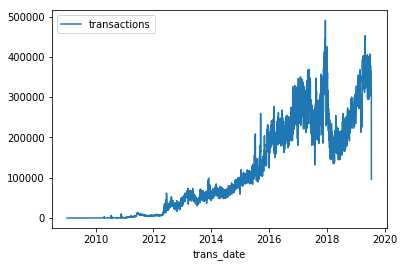

In [37]:
df.set_index('trans_date').plot()

Exercises of this tutorial are solved [here](https://www.kaggle.com/mahendrabishnoi2/exercise-as-with)

# Joining Data
Combine data sources. Critical for almost all real world problems.

Now we have the tools to obtain data from a single table. What to do if the data we want is spread across multiple tables? This is where **JOIN** comes in. **JOIN** is very useful in practical **SQL** workflows.

## Example
We'll use `pets` table which has three column:
- `ID` - id number of the pet
- `Name` - name of the pet
- `Animal` - type of the animal

We'll add one more table, called `owners` containing three columns:
- `ID` - ID number for the owner
- `Name` - Name of the owner
- `Pet_ID` - ID number for the pet that belongs to owner

<img src="https://i.imgur.com/Rx6L4m1.png"/>

To get information that applies to a certain pet, we match the `ID` column in the `pets` table to the `Pet_ID` column in the `owners` table.

<img src="https://i.imgur.com/eXvIORm.png"/>

For example:
- `pets` table shows that `Moon` is the pet with `ID` no. 2
- `owners` table shows that pet with ID no. 2 belongs to `Magnus Burnsides`

## JOIN

Using **JOIN** we can write a query to return a table that contains 2 columns, name of the pet and name of the owner
<img src="https://i.imgur.com/fLlng42.png"/>

We combine information from both tables by matching rows where the ID column in the pets table matches the Pet_ID column in the owners table.

In the query, **ON** determines which column in each table to use to combine the tables. Notice that since the `ID` column exists in both tables, we have to clarify which one to use. We use `p.ID` to refer to the `ID` column from the `pets` table, and `o.Pet_ID` refers to the `Pet_ID` column from the `owners` table.

>In general, when we're joining tables, it's a good habit to specify which table each of your columns comes from. That way, we don't have to pull up the schema every time we go back to read the query.

The type of **JOIN** we used here is called **INNER JOIN**. That means that a row will only be put in the final output table if the value in the columns you're using to combine them shows up in both the tables you're joining. For example, if Tom's ID number of 4 didn't exist in the pets table, we would only get 3 rows back from this query.

## Example: How many files are covered by each type of software license?
GitHub is the most popular place to collaborate on software projects. A GitHub **repository** (or **repo**) is a collection of files associated with a specific project.

Most repos on GitHub are shared under a specific legal license, which determines the legal restrictions on how they are used. For our example, we're going to look at how many different files have been released under each license.

We'll work with two tables in the database. The first table is the `licenses` table, which provides the name of each GitHub repo (in the repo_name column) and its corresponding license.

In [38]:
# imports
from google.cloud import bigquery

# create a client object
client = bigquery.Client()

# construct a reference to the 'github_repos' dataset
dataset_ref = client.dataset('github_repos', project="bigquery-public-data")

# api request - fetch dataset
dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


In [39]:
tables = list(client.list_tables(dataset))

for table in tables:
    print(table.table_id)

commits
contents
files
languages
licenses
sample_commits
sample_contents
sample_files
sample_repos


In [40]:
# construct a reference to the 'licenses' table
licenses_table_ref = dataset_ref.table('licenses')

# api - request - fetch table
licenses_table = client.get_table(licenses_table_ref)

# show first five rows of table
client.list_rows(licenses_table, max_results=5).to_dataframe()

,repo_name,license
0,azuredream/chat_server-client,artistic-2.0
1,Egyptian19/JemCraft,artistic-2.0
2,ZioRiP/cookie,artistic-2.0
3,ajs/perl6-log,artistic-2.0
4,JohanPotgieter/Internet,artistic-2.0


The second table is the `sample_files` table, which provides, among other information, the GitHub repo that each file belongs to (in the repo_name column).

In [41]:
# construct a reference to the 'sample_files' table
sample_files_table_ref = dataset_ref.table('sample_files')

# api request - fetch table
sample_files_table = client.get_table(sample_files_table_ref)

# show first five rows of sample_files table
client.list_rows(sample_files_table, max_results=5).to_dataframe()

,repo_name,ref,path,mode,id,symlink_target
0,git/git,refs/heads/master,RelNotes,40960,62615ffa4e97803da96aefbc798ab50f949a8db7,Documentation/RelNotes/2.10.0.txt
1,np/ling,refs/heads/master,tests/success/plug_compose.t/plug_compose.ll,40960,0c1605e4b447158085656487dc477f7670c4bac1,../../../fixtures/all/plug_compose.ll
2,np/ling,refs/heads/master,fixtures/strict-par-success/parallel_assoc_lef...,40960,b59bff84ec03d12fabd3b51a27ed7e39a180097e,../all/parallel_assoc_left.ll
3,np/ling,refs/heads/master,fixtures/sequence/parallel_assoc_2tensor2_left.ll,40960,f29523e3fb65702d99478e429eac6f801f32152b,../all/parallel_assoc_2tensor2_left.ll
4,np/ling,refs/heads/master,fixtures/success/my_dual.ll,40960,38a3af095088f90dfc956cb990e893909c3ab286,../all/my_dual.ll


write a query that uses information in both tables to determine how many files are released in each license.

In [42]:
# Query to determine the number of files per license, sorted by number of files
query = """
        SELECT L.license, COUNT(1) AS num_files
        FROM `bigquery-public-data.github_repos.sample_files` AS sf
        INNER JOIN `bigquery-public-data.github_repos.licenses` AS L
            ON sf.repo_name = L.repo_name
        GROUP BY L.license
        ORDER BY num_files DESC
        """

# set up query 
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query, job_config=safe_config)

# run query return dataframe
file_count_by_license = query_job.to_dataframe()

file_count_by_license.head()

,license,num_files
0,mit,20624490
1,gpl-2.0,17119548
2,apache-2.0,7232387
3,gpl-3.0,4960665
4,bsd-3-clause,2944149


Exercises of this tutorial are solved [here](https://www.kaggle.com/mahendrabishnoi2/exercise-joining-data)

A **WHERE** clause can limit your results to rows with certain text using the **LIKE** feature. For example, to select just the third row of the `pets` table from the tutorial, we could use the query in the picture below.

![](https://i.imgur.com/RccsXBr.png) 

You can also use `%` as a "wildcard" for any number of characters. So you can also get the third row with:

```
query = """
        SELECT * 
        FROM `bigquery-public-data.pet_records.pets` 
        WHERE Name LIKE '%ipl%'
        """
```
